In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [2]:
filepath = "../Data Preprocessing/iot23_combined.csv"
df = pd.read_csv(filepath)
del df['Unnamed: 0']
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1444670,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1444671,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1444672,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [4]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [5]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [7]:
tuned_parameters  = {
    "n_estimators": [10, 50, 100, 200],
    "learning_rate": [1e-3, 1e-2, 1e-1, 1e0]
}

# more_parameters  = {
#     "n_estimators": np.linspace(start=5, stop=50, num=10).astype(int),
#     "learning_rate": np.logspace(start=-9, stop=0, num=10, base=10)
# }

print(tuned_parameters)

{'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1.0]}


In [8]:
clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters, scoring="accuracy", n_jobs=-1, verbose=3)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/marcelocysneiros/anaconda3/envs/doutorado/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[CV 3/5] END learning_rate=0.001, n_estimators=10;, score=0.651 total time= 1.2min
[CV 5/5] END learning_rate=0.001, n_estimators=50;, score=0.651 total time= 5.7min
[CV 3/5] END learning_rate=0.001, n_estimators=200;, score=0.651 total time=22.2min
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.661 total time=11.4min
[CV 3/5] END learning_rate=0.1, n_estimators=10;, score=0.611 total time= 1.1min
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.615 total time= 5.6min
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.650 total time= 5.5min
[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.383 total time=11.1min
[CV 1/5] END learning_rate=1.0, n_estimators=10;, score=0.651 total time= 1.1min
[CV 3/5] END learning_rate=1.0, n_estimators=10;, score=0.651 total time= 1.1min
[CV 5/5] END learning_rate=1.0, n_estimators=10;, score=0.651 total time= 1.1min
[CV 2/5] END learning_rate=1.0, n_estimators=50;, score=0.651 total time= 5.6min
[CV 5/5] END learn

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [9]:
print("Best score found on development set:", clf.best_score_)

print("\nBest parameters set found on development set:", clf.best_params_)

print("\nRefit time (in seconds):", clf.refit_time_)

print("\nGrid scores on development set:")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/-%0.06f) for %r" % (mean, std * 2, param))

Best score found on development set: 0.6663546214783871

Best parameters set found on development set: {'learning_rate': 0.01, 'n_estimators': 10}

Refit time (in seconds): 40.83852696418762

Grid scores on development set:
0.651 (+/-0.000232) for {'learning_rate': 0.001, 'n_estimators': 10}
0.651 (+/-0.000232) for {'learning_rate': 0.001, 'n_estimators': 50}
0.651 (+/-0.000232) for {'learning_rate': 0.001, 'n_estimators': 100}
0.651 (+/-0.000867) for {'learning_rate': 0.001, 'n_estimators': 200}
0.666 (+/-0.038686) for {'learning_rate': 0.01, 'n_estimators': 10}
0.572 (+/-0.001035) for {'learning_rate': 0.01, 'n_estimators': 50}
0.661 (+/-0.000236) for {'learning_rate': 0.01, 'n_estimators': 100}
0.583 (+/-0.000107) for {'learning_rate': 0.01, 'n_estimators': 200}
0.611 (+/-0.000412) for {'learning_rate': 0.1, 'n_estimators': 10}
0.582 (+/-0.201836) for {'learning_rate': 0.1, 'n_estimators': 50}
0.482 (+/-0.246199) for {'learning_rate': 0.1, 'n_estimators': 100}
0.415 (+/-0.341018) fo

Text(0.5, 1.0, 'GridSearchCV results')

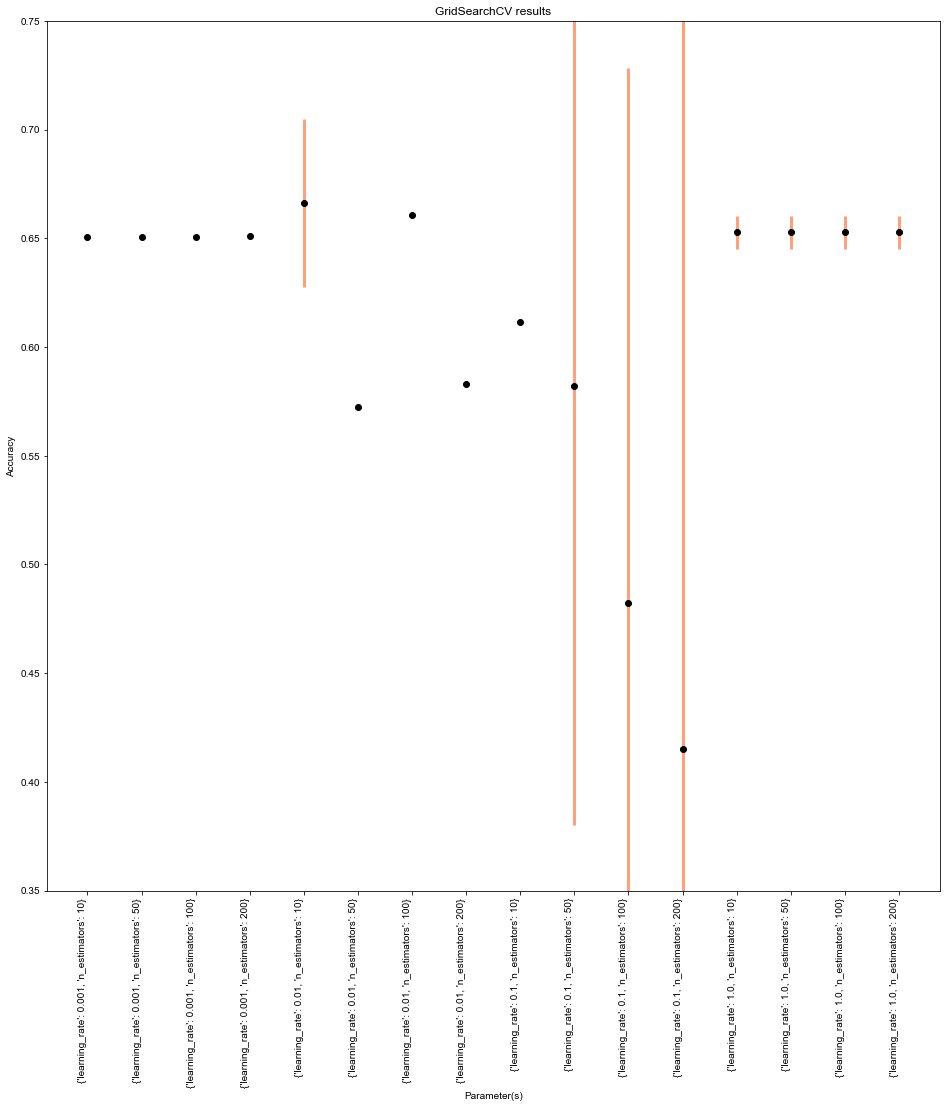

In [10]:
x = [str(x) for x in params]
y = means
err = stds * 2
step = 1

fig, ax = plt.subplots(figsize=(16,16))
plt.style.use('seaborn-whitegrid')
plt.errorbar(x[::step], y[::step], yerr=err[::step], fmt='o', color='black', ecolor='lightsalmon', elinewidth=3, capsize=0);
plt.xlabel('Parameter(s)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
min_y = np.floor(10*np.min(y[::step]))/10 - 0.05
max_y = np.ceil(10*np.max(y[::step]))/10 + 0.05
plt.ylim(min_y,max_y)
plt.yticks(np.linspace(min_y, max_y, int(1+(max_y-min_y)*10*2)))
plt.title('GridSearchCV results')

In [11]:
print("Detailed classification report:")
print(" - The model is trained on the full development set.")
print(" - The scores are computed on the full evaluation set.")
Y_true, Y_pred = Y_test, clf.predict(X_test)
print(classification_report(Y_true, Y_pred))

Detailed classification report:
 - The model is trained on the full development set.
 - The scores are computed on the full evaluation set.


/Users/marcelocysneiros/anaconda3/envs/doutorado/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END learning_rate=0.001, n_estimators=10;, score=0.651 total time= 1.2min
[CV 2/5] END learning_rate=0.001, n_estimators=100;, score=0.651 total time=11.3min
[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=0.651 total time= 1.1min
[CV 2/5] END learning_rate=0.01, n_estimators=10;, score=0.690 total time= 1.1min
[CV 3/5] END learning_rate=0.01, n_estimators=10;, score=0.651 total time= 1.1min
[CV 4/5] END learning_rate=0.01, n_estimators=10;, score=0.650 total time= 1.1min
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.572 total time= 5.6min
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.572 total time= 5.6min
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.661 total time=11.3min
[CV 2/5] END learning_rate=0.1, n_estimators=10;, score=0.611 total time= 1.2min
[CV 5/5] END learning_rate=0.1, n_estimators=10;, score=0.611 total time= 1.1min
[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.382 total time= 5.6min
[CV 1/5] END le

/Users/marcelocysneiros/anaconda3/envs/doutorado/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    Attack       0.00      0.00      0.00       798
                    Benign       0.00      0.00      0.00     39535
                       C&C       0.00      0.00      0.00      3102
          C&C-FileDownload       0.00      0.00      0.00         9
             C&C-HeartBeat       0.00      0.00      0.00        69
C&C-HeartBeat-FileDownload       0.00      0.00      0.00         3
                 C&C-Torii       0.00      0.00      0.00         7
                      DDoS       1.00      0.82      0.90     27856
              FileDownload       0.00      0.00      0.00         3
                     Okiru       0.00      0.00      0.00     52607
 PartOfAHorizontalPortScan       0.62      1.00      0.77    164946

                  accuracy                           0.65    288935
                 macro avg       0.15      0.17      0.15    288935
              weighted avg       0.45      0.6

/Users/marcelocysneiros/anaconda3/envs/doutorado/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
labels = df['label'].unique().tolist()
labels.remove('C&C-Mirai')
print(labels)

['PartOfAHorizontalPortScan', 'Benign', 'Okiru', 'DDoS', 'C&C-HeartBeat', 'C&C-Torii', 'C&C', 'Attack', 'C&C-FileDownload', 'FileDownload', 'C&C-HeartBeat-FileDownload']


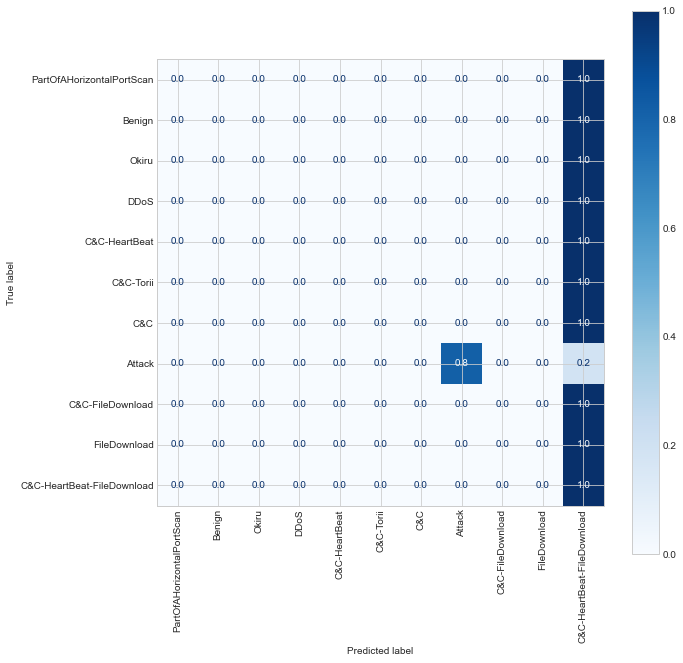

[CV 2/5] END learning_rate=0.001, n_estimators=50;, score=0.651 total time= 5.7min
[CV 1/5] END learning_rate=0.001, n_estimators=200;, score=0.651 total time=22.3min
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.661 total time=11.4min
[CV 5/5] END learning_rate=0.01, n_estimators=200;, score=0.583 total time=22.3min
[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.575 total time=21.9min
[CV 2/5] END learning_rate=1.0, n_estimators=200;, score=0.651 total time=16.6min
[CV 5/5] END learning_rate=0.001, n_estimators=10;, score=0.651 total time= 1.2min
[CV 3/5] END learning_rate=0.001, n_estimators=100;, score=0.651 total time=11.2min
[CV 4/5] END learning_rate=0.001, n_estimators=200;, score=0.652 total time=22.1min
[CV 2/5] END learning_rate=0.01, n_estimators=200;, score=0.583 total time=22.5min
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.615 total time=11.1min
[CV 3/5] END learning_rate=1.0, n_estimators=50;, score=0.651 total time= 5.5min
[CV 1/

In [13]:
cm = confusion_matrix(Y_true, Y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,
          cmap=plt.cm.Blues,
          xticks_rotation=90,
          values_format='.1f')